In [104]:
# import libraries
from markdown_predictions import get_data
import os
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = get_data(os.path.join(os.path.dirname(os.getcwd()),"raw_data"))

In [95]:
X = df.select_dtypes("number")
y = X.pop("two_week_sales")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [97]:
scaler = RobustScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [7]:
linear_model = LinearRegression().fit(X_train,y_train)

In [8]:
y_pred = linear_model.predict(X_test)

In [9]:
rmse = ((y_test - y_pred) ** 2).mean() ** 0.5
rmse

41.69068236429461

In [24]:
rmse_baseline = ((y_test - y_test.mean()) ** 2).mean() ** 0.5

In [25]:
rmse_baseline

309.5922315176031

In [40]:
el_model = ElasticNet(max_iter=20000).fit(X_train,y_train)
y_pred = el_model.predict(X_test)

In [41]:
rmse = ((y_test - y_pred) ** 2).mean() ** 0.5
rmse

43.33764480764413

In [48]:
model = ElasticNet(max_iter=20000)

# Hyperparameter Grid
grid = {'alpha': [0.01, 0.1, 1], 
        'l1_ratio': [0.2, 0.5, 0.8]}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'neg_root_mean_squared_error',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(X_train,y_train)

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4142778.1634999127, tolerance: 43266.4032552874
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=20000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_root_mean_squared_error')

In [50]:
search.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [51]:
y_pred_grid = search.predict(X_test)

In [52]:
rmse = ((y_test - y_pred_grid) ** 2).mean() ** 0.5
rmse

41.76577151656789

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instanciate model
model = ElasticNet(max_iter=10000)

# Hyperparameter Grid
grid = {'l1_ratio': stats.uniform(0, 1), 'alpha': [0.001, 0.01, 0.1, 1]}

# Instanciate Grid Search
search_random = RandomizedSearchCV(model, grid, 
                           scoring='neg_root_mean_squared_error',
                            n_iter=100,  # number of draws
                            cv=5, n_jobs=-1)

# Fit data to Grid Search
search_random.fit(X_train, y_train)
search_random.best_estimator_

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3306277.6662690965, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3340636.6155281216, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3271194.3731499454, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/ho

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290462.3821910764, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3482767.5850094063, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3561989.980696406, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3396511.0232180804, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3300409.9216373465, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3449434.417977399, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/hom

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3319463.048254538, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3328945.417171812, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3524587.3860606235, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3504603.654344216, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3495829.2389186798, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3427839.940020766, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/hom

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3379008.9306416134, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483267.7770318775, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3265077.465679428, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/ho

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3375050.551697199, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3637603.218884297, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3475951.595913749, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/ja

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3359642.918893787, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3441995.4167369604, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3585105.4826651, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350039.078552075, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3357384.471558683, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3353243.796562859, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/j

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3316589.136607738, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3390468.523991092, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770095.5950190136, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/ja

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3359777.678531253, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386810.4408994825, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3170559.049776197, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/hom

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3283906.027659444, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3523092.8135731695, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3322646.5776818297, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3259076.2900033193, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3188474.247225449, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3326739.938231167, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3422309.8443952072, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3241702.1621007924, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3260969.519228993, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3261865.465542165, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3362286.9659526516, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3339488.730170139, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385220.585834956, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3183036.6312656556, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3372567.36430392, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4141067.540307735, tolerance: 43266.4032552874
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.8120158091972814, max_iter=10000)

In [55]:
y_pred_grid = search_random.predict(X_test)

In [56]:
rmse = ((y_test - y_pred_grid) ** 2).mean() ** 0.5
rmse

41.75970557603063

In [57]:
from sklearn.neighbors import KNeighborsRegressor

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3355009.9585818, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3421817.0985496026, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3340422.7364137336, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3379897.8709855685, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3436124.2078538826, tolerance: 35257.75138027977
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3266351.761007935, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3278491.307309202, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3234495.168330079, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3180499.487754617, tolerance: 34179.636160625174
  model = cd_fast.enet_coordinate_descent(
/home/

/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3378065.338935905, tolerance: 35015.150730792426
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483018.7880034084, tolerance: 34174.9140433626
  model = cd_fast.enet_coordinate_descent(
/home/james/.pyenv/versions/markdown_predictions/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3184701.2540162588, tolerance: 34437.502116428965
  model = cd_fast.enet_coordinate_descent(
/hom

In [68]:
neigh = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)

In [69]:
neigh_y_pred = neigh.predict(X_test)

In [70]:
rmse = ((y_test - neigh_y_pred ) ** 2).mean() ** 0.5
rmse

147.51256373789425

In [98]:
linear_model = LinearRegression().fit(X_train,y_train)

In [99]:
y_pred = linear_model.predict(X_test)

In [100]:
rmse = ((y_test - y_pred) ** 2).mean() ** 0.5
rmse

41.37450142726708

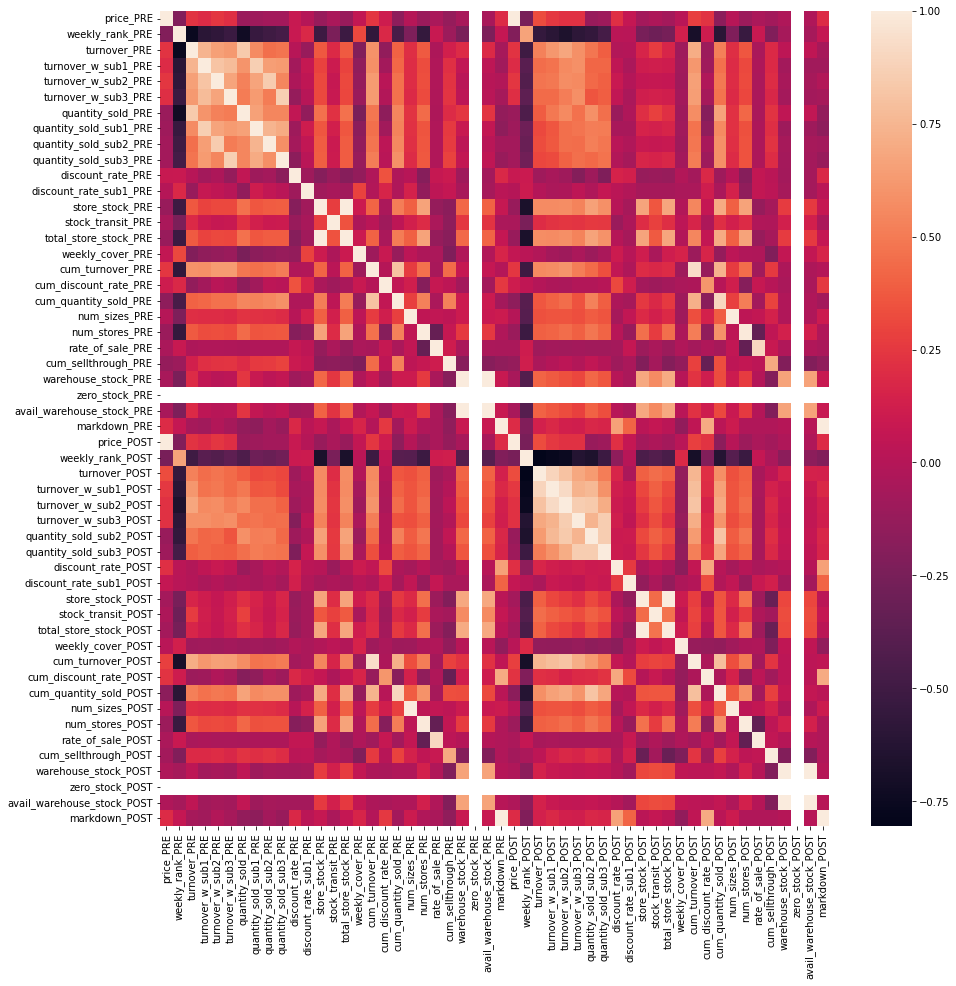

In [106]:
fix, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(X.corr())
plt.show()

In [118]:
corrs = pd.DataFrame(df.select_dtypes("number").corr().stack()).reset_index()
corrs.columns = ["col1", "col2", "corr"]
corrs = corrs[corrs["corr"] != 1]
corrs[corrs["col1"]=="two_week_sales"].sort_values("corr")

,col1,col2,corr
2577,two_week_sales,weekly_rank_POST,-0.744042
2551,two_week_sales,weekly_rank_PRE,-0.512708
2589,two_week_sales,weekly_cover_POST,-0.165441
2571,two_week_sales,rate_of_sale_PRE,-0.084033
2576,two_week_sales,price_POST,-0.081561
2550,two_week_sales,price_PRE,-0.081561
2560,two_week_sales,discount_rate_PRE,-0.080330
2565,two_week_sales,weekly_cover_PRE,-0.063101
2595,two_week_sales,rate_of_sale_POST,-0.053526
2561,two_week_sales,discount_rate_sub1_PRE,-0.027030
